# KNN
The goal of this notebook is to implement a KNN-classifier.

***
## Benchmark 
Benchmark different methods to derive the euclidian distance, namely:
- `numpy.linalg.norm` (via `numpy.apply_along_axis`)
- `scipy.spatial.distance.euclidian` (via `numpy.apply_along_axis`)
- `numpy.linalg.norm` (vectorized)

In [42]:
%%timeit
np.apply_along_axis(func1d=lambda x: np.linalg.norm(x-a), axis=1, arr=vecs)

8.93 s ± 45.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%%timeit
np.apply_along_axis(func1d=lambda x: distance.euclidean(x,a), axis=1, arr=vecs)

14.6 s ± 80.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%%timeit
np.linalg.norm(np.ones_like(vecs)*a - vecs, axis=1)

107 ms ± 572 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


***
## Preface

In [70]:
# change directory to reference source code
import os
os.chdir("/home/jovyan/work")

# additional libs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.grid_search import GridSearchCV, ParameterGrid
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import custom modules
from src.knn import KNNC
from src.utils import multiclass_confusion_matrix

***
# Task 1

In [17]:
# Load the data
df_forrest = pd.read_csv("./data/ForestTypesData.csv")
X = df_forrest.drop("class", axis=1).values
y = df_forrest["class"].apply(lambda x: x[0]).values

## (a) Train = Test

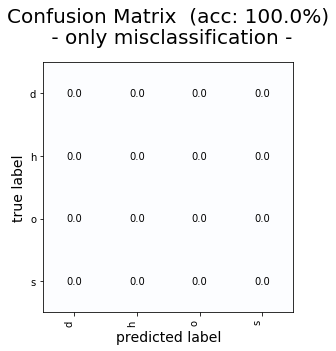

In [20]:
# build the Classifier
knnc = KNNC(k=1)
knnc.fit(X, y)

# plot the confusion matrix
multiclass_confusion_matrix(y, knnc.predict(X), only_wrong=True, normed=True);

## (b) 50-50 Train-Test Split

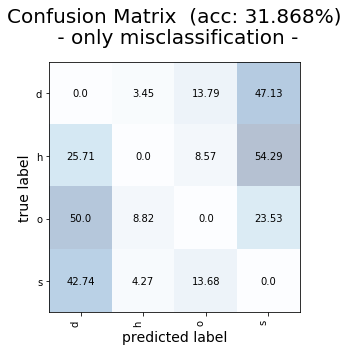

In [31]:
# train-test split
X_train = X[:250]
y_train = y[:250]
X_test = X[250:]
y_test = y[250:]

# build the Classifier
knnc = KNNC(k=1)
knnc.fit(X_train, y_test)

# plot the confusion matrix
multiclass_confusion_matrix(y_test, knnc.predict(X_test), only_wrong=True, normed=True);

## 3-fold Cross-Validation

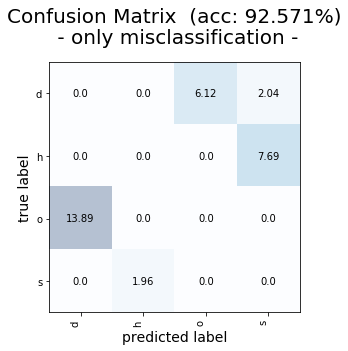

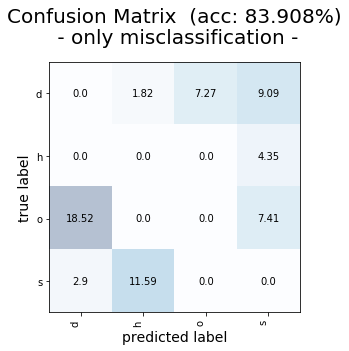

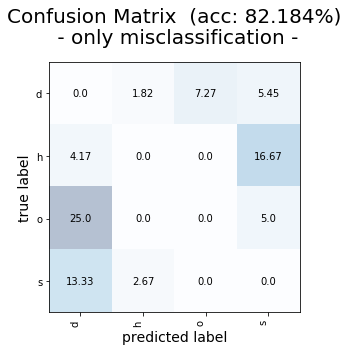

In [136]:
# 3 fold cv
for train, test in KFold(n_splits=3).split(X):
    knnc = KNNC(k=1)
    knnc.fit(X[train], y[train])
    multiclass_confusion_matrix(y[test], knnc.predict(X[test]),only_wrong=True, normed=True);

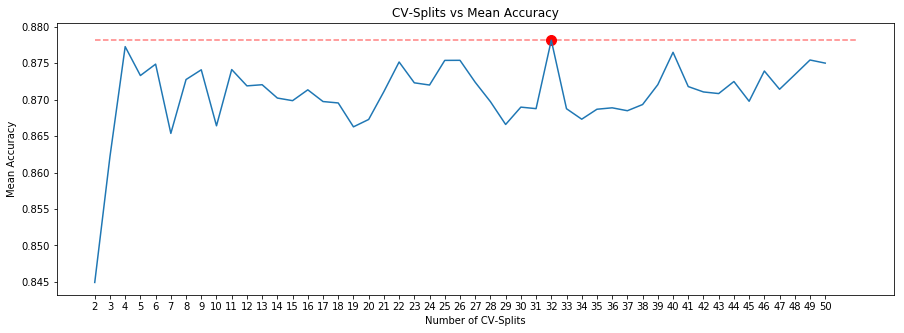

In [135]:
# test cv splits 
S = range(2,51)
scores = {}
for s in S:
    scores[s] = cross_val_score(KNNC(k=1), X, y, cv=s).mean()

# get best split
best_idx = np.argmax(list(scores.values()))
best_s = list(scores.keys())[best_idx]

# plot result
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(range(len(scores)), list(scores.values()))
plt.xticks(range(len(scores)), list(scores.keys()))
plt.scatter(best_idx, scores[best_s], c="red", s=100)
plt.hlines(scores[best_s], 0, 50, linestyle="--", color="red", alpha=.5)
plt.xlabel("Number of CV-Splits")
plt.ylabel("Mean Accuracy")
plt.title("CV-Splits vs Mean Accuracy");

# Task 2

In [195]:
# build the estimator
ppl = Pipeline([("clf", KNNC())])

# build the pipeline
pgrid = [{'clf__k' : list(range(1, 21)),
         },
        ]

# run the gridsearch
gs_knn = GridSearchCV(estimator=ppl, 
                      param_grid=pgrid,
                      cv=10,
                      verbose=1
                     )

result = gs_knn.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.6s finished


In [196]:
print("k={} gives the best result of {:.4}.".format(result.best_params_["clf__k"], result.best_score_))

k=4 gives the best result of 0.8948.
